In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("student_data.csv")
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


y:grade

<AxesSubplot:xlabel='grade', ylabel='count'>

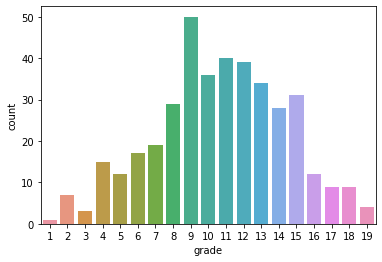

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='grade', data=df)

<AxesSubplot:>

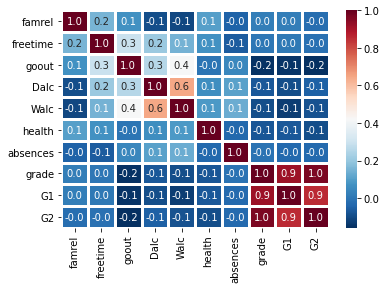

In [5]:
import seaborn as sns
df_cor=df.corr(method='pearson')
sns.heatmap(df_cor, annot=True, fmt='.1f', cmap='RdBu_r', linewidth=3)

In [6]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


다 수치형 변수이므로 knn으로 결측치 대체

In [13]:
from sklearn.impute import KNNImputer

KNN_data=df.drop(columns=['school', 'sex', 'paid', 'activities'])

imputer=KNNImputer()
df_filled=imputer.fit_transform(KNN_data)
df_filled=pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns]=df_filled

In [14]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [15]:
df=pd.get_dummies(df, drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_MS       395 non-null    uint8  
 11  sex_M           395 non-null    uint8  
 12  paid_yes        395 non-null    uint8  
 13  activities_yes  395 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 32.5 KB


In [17]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['grade'])
y=df['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2022)

In [18]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV

param_grid=[{'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10]}]

grid_svm=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_svm.fit(X_train_sc, y_train)

print(grid_svm.best_params_)

{'C': 100, 'gamma': 0.001}


In [20]:
svm=SVR(C=100, gamma=0.01)
svm.fit(X_train_sc, y_train)
pred=svm.predict(X_test_sc)

print(svm.score(X_test_sc, y_test)) #정확도
print(np.sqrt(mean_squared_error(y_test, pred)))

0.9475143051228021
0.860734178047865


결정계수는 94%, rmse=0.86

In [23]:
rf_grid=[{'max_depth':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}]

rf=GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid=rf_grid, cv=5)
rf.fit(X_train, y_train)
print(rf.best_params_)

{'max_depth': 6, 'min_samples_split': 2}


In [26]:
rf=RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_split=2)
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

0.956244742381649
0.7858934970802764


결정계수는 95%, rmse=0.78

In [31]:
xgb_grid=[{'max_depth':[2,4,6,8,10]}]
xgb=GridSearchCV(XGBRegressor(n_estimators=1000), param_grid=xgb_grid, cv=5)
xgb.fit(X_train, y_train)
print(xgb.best_params_)

{'max_depth': 10}


In [32]:
xgb=XGBRegressor(n_estimators=1000, max_depth=10)
xgb.fit(X_train, y_train)
print(xgb.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, xgb.predict(X_test))))

0.963211004628444
0.7206220334000073


결정계수는 96%, rmse=0.72

xgb의 모델 성능이 가장 좋다. 변수 중요도를 확인하면

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

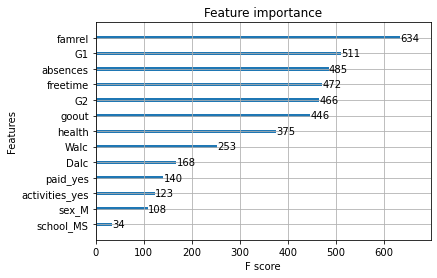

In [33]:
from xgboost import plot_importance

plot_importance(xgb)